In [ ]:
# This pandas file merges two financial spreadsheets and one disaster summary spreadsheet.

# The column that facilitates the merge is a concatenation of disaster number, state and county.

# The resulting dataframe can track financial damage by disaster type.

In [17]:
# We'll use Pandas and Numpy for this Program
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Read the three necessary files. The first is a summary of declared disasters
# dating back to 1953, with no financial data.  The next two describe FEMA 
# approved moneys for owners and renters, respective, in FY 2019.

complete_df = pd.read_csv('./interim_data/Merged_data.csv')
complete_df

,address,IHP Amount for Owners,Owners Approved,Owners <$10k,Owners $10-25k,Owners $25k - Max,Owners Max,IHP Amount for Renters,Renters Approved,Renters $25k - Max,Renters Max,incidentType,fyDeclared
0,"4116, IL, Brown (County)",32272,8.0,6.0,2.0,0.0,0.0,0,0.0,0.0,0.0,Flood,2013.0
1,"4116, IL, Bureau (County)",622024,260.0,251.0,9.0,0.0,0.0,29177,19.0,0.0,0.0,Flood,2013.0
2,"4116, IL, Calhoun (County)",31821,14.0,14.0,0.0,0.0,0.0,7079,4.0,0.0,0.0,Flood,2013.0
3,"4116, IL, Clark (County)",44331,11.0,9.0,2.0,0.0,0.0,0,0.0,0.0,0.0,Flood,2013.0
4,"4116, IL, Cook (County)",90293298,36895.0,35846.0,966.0,83.0,29.0,37099655,12965.0,35.0,1.0,Flood,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,"4466, TX, Montgomery (County)",8022615,1100.0,780.0,293.0,27.0,0.0,813403,207.0,0.0,0.0,Flood,2020.0
1124,"4466, TX, Orange (County)",9672865,1585.0,1186.0,374.0,25.0,0.0,1039349,322.0,0.0,0.0,Flood,2020.0
1125,"4466, TX, San Jacinto (County)",82351,20.0,18.0,2.0,0.0,0.0,4214,3.0,0.0,0.0,Flood,2020.0
1126,"4332, TX, Evangeline (Parish)",0,0.0,0.0,0.0,0.0,0.0,500,1.0,0.0,0.0,0,0.0


In [4]:
complete_df[["Disaster", "State", "County"]] = complete_df.address.str.split(",", expand = True)
complete_df

,address,IHP Amount for Owners,Owners Approved,Owners <$10k,Owners $10-25k,Owners $25k - Max,Owners Max,IHP Amount for Renters,Renters Approved,Renters $25k - Max,Renters Max,incidentType,fyDeclared,Disaster,State,County
0,"4116, IL, Brown (County)",32272,8.0,6.0,2.0,0.0,0.0,0,0.0,0.0,0.0,Flood,2013.0,4116,IL,Brown (County)
1,"4116, IL, Bureau (County)",622024,260.0,251.0,9.0,0.0,0.0,29177,19.0,0.0,0.0,Flood,2013.0,4116,IL,Bureau (County)
2,"4116, IL, Calhoun (County)",31821,14.0,14.0,0.0,0.0,0.0,7079,4.0,0.0,0.0,Flood,2013.0,4116,IL,Calhoun (County)
3,"4116, IL, Clark (County)",44331,11.0,9.0,2.0,0.0,0.0,0,0.0,0.0,0.0,Flood,2013.0,4116,IL,Clark (County)
4,"4116, IL, Cook (County)",90293298,36895.0,35846.0,966.0,83.0,29.0,37099655,12965.0,35.0,1.0,Flood,2013.0,4116,IL,Cook (County)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,"4466, TX, Montgomery (County)",8022615,1100.0,780.0,293.0,27.0,0.0,813403,207.0,0.0,0.0,Flood,2020.0,4466,TX,Montgomery (County)
1124,"4466, TX, Orange (County)",9672865,1585.0,1186.0,374.0,25.0,0.0,1039349,322.0,0.0,0.0,Flood,2020.0,4466,TX,Orange (County)
1125,"4466, TX, San Jacinto (County)",82351,20.0,18.0,2.0,0.0,0.0,4214,3.0,0.0,0.0,Flood,2020.0,4466,TX,San Jacinto (County)
1126,"4332, TX, Evangeline (Parish)",0,0.0,0.0,0.0,0.0,0.0,500,1.0,0.0,0.0,0,0.0,4332,TX,Evangeline (Parish)


In [12]:
grouping = complete_df.groupby(complete_df["State"])
sum_grouping = grouping.sum()
first_grouping = grouping.first()

In [13]:
del(sum_grouping["fyDeclared"])
sum_grouping

,IHP Amount for Owners,Owners Approved,Owners <$10k,Owners $10-25k,Owners $25k - Max,Owners Max,IHP Amount for Renters,Renters Approved,Renters $25k - Max,Renters Max
State,,,,,,,,,,
AK,28804366,4407.0,3633.0,319.0,455.0,30.0,729691,217.0,3.0,0.0
AL,17090968,4343.0,3937.0,297.0,109.0,49.0,7484733,3446.0,2.0,2.0
AR,16448380,2088.0,1504.0,390.0,194.0,61.0,2672766,835.0,1.0,0.0
AS,18607988,4959.0,4662.0,243.0,54.0,0.0,1905066,1120.0,0.0,0.0
CA,81110624,8704.0,6708.0,374.0,1622.0,317.0,61522219,10831.0,108.0,15.0
CO,53252166,13460.0,12178.0,871.0,411.0,256.0,8651481,3090.0,6.0,1.0
FL,674637891,358866.0,345422.0,11485.0,1959.0,426.0,557184908,465078.0,69.0,13.0
GA,24221939,8437.0,7877.0,449.0,111.0,39.0,12120455,9034.0,1.0,0.0
HI,11292808,789.0,541.0,39.0,209.0,0.0,2589254,471.0,3.0,0.0


In [23]:

sum_grouping = sum_grouping.loc[:,["IHP Amount for Owners", "Owners Approved", "IHP Amount for Renters", "Renters Approved"]]
sum_grouping["Average Payout for Owners, Dollars"] = sum_grouping["IHP Amount for Owners"]/sum_grouping["Owners Approved"]
sum_grouping["Average Payout for Renters, Dollars"] = sum_grouping["IHP Amount for Renters"]/sum_grouping["Renters Approved"]
sum_grouping

,IHP Amount for Owners,Owners Approved,IHP Amount for Renters,Renters Approved,"Average Payout for Owners, Dollars","Average Payout for Renters, Dollars"
State,,,,,,
AK,28804366,4407.0,729691,217.0,6536.048559,3362.631336
AL,17090968,4343.0,7484733,3446.0,3935.290813,2172.006094
AR,16448380,2088.0,2672766,835.0,7877.576628,3200.917365
AS,18607988,4959.0,1905066,1120.0,3752.367009,1700.951786
CA,81110624,8704.0,61522219,10831.0,9318.775735,5680.197489
CO,53252166,13460.0,8651481,3090.0,3956.327340,2799.832039
FL,674637891,358866.0,557184908,465078.0,1879.915877,1198.046151
GA,24221939,8437.0,12120455,9034.0,2870.918454,1341.648771
HI,11292808,789.0,2589254,471.0,14312.811153,5497.354565


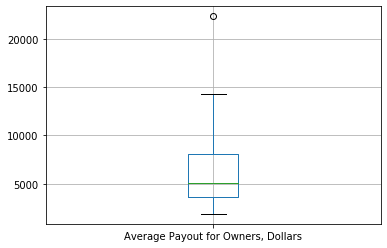

In [28]:
owner = sum_grouping.loc[:,["Average Payout for Owners, Dollars"]]

owner_box = owner.boxplot()
owner_box
plt.savefig('./output_visual/Owner Boxplot')

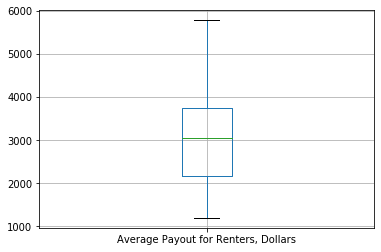

In [27]:
renter = sum_grouping.loc[:,["Average Payout for Renters, Dollars"]]


renter_box = renter.boxplot()
renter_box
plt.savefig('./output_visual/Renter Boxplot')